In [1]:
!python3 --version

Python 3.8.11


In [2]:
from string import ascii_uppercase

import pandas

from utils import calculate_percent_replicating_Target, plot_simple_comparison

In [3]:
variable = '# of times imaged'
variable_to_save = variable.replace(' ','_')
variable_to_save = variable_to_save.replace('#','Number')

plate_df = pandas.DataFrame()

plate_df = plate_df.append({'Plate Name List' : ['BR00116991','BR00116992','BR00116993','BR00116994'], 
variable : 1, 'Batch' : 'CPJUMP1', 'Percent Replicating' : calculate_percent_replicating_Target(
    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
    ['BR00116991','BR00116992','BR00116993','BR00116994'])}, ignore_index=True)

for eachtime in range(2,8):
    letter = ascii_uppercase[eachtime-2]
    plate_df = plate_df.append({'Plate Name List' : [f'BR00116991{letter}',f'BR00116992{letter}',f'BR00116993{letter}',f'BR00116994{letter}'], 
    variable : eachtime, 'Batch' : 'CPJUMP1', 'Percent Replicating' : calculate_percent_replicating_Target(
        '../profiles-cp-jump1/profiles/2020_12_08_CPJUMP1_Bleaching',
        [f'BR00116991{letter}',f'BR00116992{letter}',f'BR00116993{letter}',f'BR00116994{letter}'])}, ignore_index=True)



Saved to ../figures/# of times imaged-Percent Replicating-Batch-None-None.png


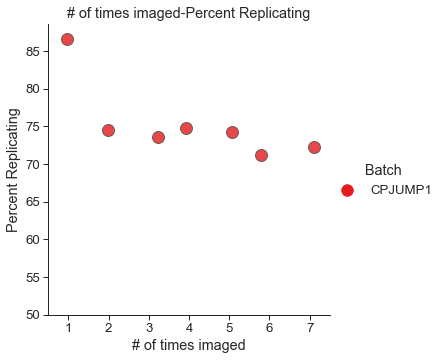

In [4]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,y='Percent Replicating',hue='Batch')

In [5]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)